<a href="https://colab.research.google.com/github/gohenry/DataScienceCoursera/blob/master/ArtAuction_Price1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
ls 

drive/  sample_data/


In [3]:
cd drive/My Drive

/content/drive/My Drive


In [4]:
ls

'2013_Korean_Tax_Organizer(Outbound)(Kr).doc'
'2018-3-23 2.WIRE ESCROW INFORMATION(D).JPG'
 CAM00001.jpg
 CAM00002.jpg
 CAM00003.jpg
 CAM00006.jpg
 CAM00009.jpg
 CAM00010.jpg
 CAM00011.jpg
 CAM00012.jpg
 CAM00013.jpg
 CAM00014.jpg
 CAM00015.jpg
 CAM00016.jpg
 CAM00017.jpg
 CAM00019.jpg
 CAM00021.jpg
'Colab Notebooks'/
'CV_AnitaJwa copy.doc'
'FINAL SURVEY.pdf'
'[GoHenry] Bass Lake - Yosemite.gmap'
'[GoHenry] Bayland National Park.gmap'
'[GoHenry] Big Sur.gmap'
'[GoHenry] Durante'\''s Tavern.gmap'
'[GoHenry] Golden Gate Bridge View.gmap'
'[GoHenry] Great Places in SF.gmap'
'[GoHenry] Lighthouse Hostel.gmap'
'[GoHenry] Muir Woods .gmap'
'[GoHenry] Night view of SF city.gmap'
'[GoHenry] Sausalito.gmap'
'Google Buzz'/
 Henry2009_all.doc
'How Google Makes Money.gslides'
'< I always liked to do the following >.gdoc'
 image3.jpeg
'법률저널 광고.jpg'
'Korea Trip 1.gdoc'
'Law Offices of E.J. Hong - Checklist_01.gdoc'
'Law Offices of E.J. Hong - Checklist_01.pdf'
 message_zdm.html
 Oct.zip
 r

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf
import pandas as pd


In [132]:
!pip install -q xlrd

import pandas as pd
df = pd.read_excel('result_2017_2018.xlsx')
df


,num_author,creation_year,height,width,estimate_low,estimate_high,auction_year,artist_birth,artist_death,hammer price
0,1,1983.0,14.0,10.0,80669.0,141170.0,2018.0,1928.0,1987.0,161338.0
1,1,1982.0,14.0,11.0,92678.0,139017.0,2018.0,1928.0,1987.0,NaN
2,1,1984.0,20.0,16.0,91964.0,118239.0,2018.0,1928.0,1987.0,128750.0
3,1,1982.0,8.0,16.0,131377.0,197066.0,2018.0,1928.0,1987.0,105102.0
4,1,1982.0,8.0,16.0,131378.0,197067.0,2018.0,1928.0,1987.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1453,100,1999.0,8.0,66.0,2117691.0,2911825.0,2018.0,1923.0,2015.0,2183869.0
1454,100,2012.0,6.0,120.0,1800000.0,2500000.0,2018.0,1923.0,2015.0,1900000.0
1455,100,1986.0,2.0,94.0,3500000.0,4500000.0,2018.0,1923.0,2015.0,4343000.0
1456,100,1989.0,76.0,114.0,3000000.0,5000000.0,2017.0,1923.0,2015.0,3300000.0


In [0]:
df=df.drop(columns=['artist_death'])

In [0]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()


In [135]:
df

,num_author,creation_year,height,width,estimate_low,estimate_high,auction_year,artist_birth,hammer price
0,1,1983.0,14.0,10.0,80669.0,141170.0,2018.0,1928.0,161338.0
2,1,1984.0,20.0,16.0,91964.0,118239.0,2018.0,1928.0,128750.0
3,1,1982.0,8.0,16.0,131377.0,197066.0,2018.0,1928.0,105102.0
5,1,1982.0,6.0,20.0,91964.0,131378.0,2018.0,1928.0,72258.0
6,1,1986.0,22.0,22.0,131377.0,197066.0,2018.0,1928.0,170791.0
...,...,...,...,...,...,...,...,...,...
1453,100,1999.0,8.0,66.0,2117691.0,2911825.0,2018.0,1923.0,2183869.0
1454,100,2012.0,6.0,120.0,1800000.0,2500000.0,2018.0,1923.0,1900000.0
1455,100,1986.0,2.0,94.0,3500000.0,4500000.0,2018.0,1923.0,4343000.0
1456,100,1989.0,76.0,114.0,3000000.0,5000000.0,2017.0,1923.0,3300000.0


In [73]:
# remove rows with NaN on column 'hammer price'
#df = df[np.isfinite(df['hammer price'])]
#df = df[np.isfinite(df['creation_year'])]
#df = df[np.isfinite(df['estimate_low'])]
#df = df[np.isfinite(df['auction_year'])]
#df = df[np.isfinite(df['artist_birth'])]
#df

,num_author,creation_year,height,width,estimate_low,estimate_high,auction_year,artist_birth,artist_death,hammer price,log hammer price,binned
0,1,1983.0,14.0,10.0,80669.0,141170.0,2018.0,1928.0,1987.0,161338.0,11.991257,12
2,1,1984.0,20.0,16.0,91964.0,118239.0,2018.0,1928.0,1987.0,128750.0,11.765628,12
3,1,1982.0,8.0,16.0,131377.0,197066.0,2018.0,1928.0,1987.0,105102.0,11.562687,12
5,1,1982.0,6.0,20.0,91964.0,131378.0,2018.0,1928.0,1987.0,72258.0,11.187998,12
6,1,1986.0,22.0,22.0,131377.0,197066.0,2018.0,1928.0,1987.0,170791.0,12.048196,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1453,100,1999.0,8.0,66.0,2117691.0,2911825.0,2018.0,1923.0,2015.0,2183869.0,14.596609,16
1454,100,2012.0,6.0,120.0,1800000.0,2500000.0,2018.0,1923.0,2015.0,1900000.0,14.457364,16
1455,100,1986.0,2.0,94.0,3500000.0,4500000.0,2018.0,1923.0,2015.0,4343000.0,15.284076,16
1456,100,1989.0,76.0,114.0,3000000.0,5000000.0,2017.0,1923.0,2015.0,3300000.0,15.009433,16


In [136]:
df.dtypes

num_author         int64
creation_year    float64
height           float64
width            float64
estimate_low     float64
estimate_high    float64
auction_year     float64
artist_birth     float64
hammer price     float64
dtype: object

In [0]:
df['log hammer price'] = np.log(df['hammer price'])

In [138]:
df.dtypes

num_author            int64
creation_year       float64
height              float64
width               float64
estimate_low        float64
estimate_high       float64
auction_year        float64
artist_birth        float64
hammer price        float64
log hammer price    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd161bc39b0>]],
      dtype=object)

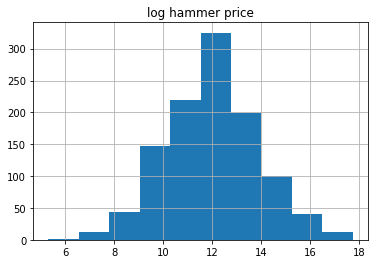

In [139]:
df.hist(column='log hammer price', bins=10)

In [176]:
bins = [0,4,6,8,10,12,14,16,18]
labels = [0,1,2,3,4,5,6,7]
df['binned'] = pd.cut(df['log hammer price'], bins=bins, labels=labels)
print(df)

      num_author  creation_year  height  width  estimate_low  estimate_high  \
0              1         1983.0    14.0   10.0       80669.0       141170.0   
2              1         1984.0    20.0   16.0       91964.0       118239.0   
3              1         1982.0     8.0   16.0      131377.0       197066.0   
5              1         1982.0     6.0   20.0       91964.0       131378.0   
6              1         1986.0    22.0   22.0      131377.0       197066.0   
...          ...            ...     ...    ...           ...            ...   
1453         100         1999.0     8.0   66.0     2117691.0      2911825.0   
1454         100         2012.0     6.0  120.0     1800000.0      2500000.0   
1455         100         1986.0     2.0   94.0     3500000.0      4500000.0   
1456         100         1989.0    76.0  114.0     3000000.0      5000000.0   
1457         100         1978.0     2.0   52.0     1500000.0      2500000.0   

      auction_year  artist_birth  hammer price  log

In [0]:
dataset = df.values
X = dataset[:,0:8]
Y = dataset[:,10]

In [178]:
X

array([[1, 1983.0, 14.0, ..., 141170.0, 2018.0, 1928.0],
       [1, 1984.0, 20.0, ..., 118239.0, 2018.0, 1928.0],
       [1, 1982.0, 8.0, ..., 197066.0, 2018.0, 1928.0],
       ...,
       [100, 1986.0, 2.0, ..., 4500000.0, 2018.0, 1923.0],
       [100, 1989.0, 76.0, ..., 5000000.0, 2017.0, 1923.0],
       [100, 1978.0, 2.0, ..., 2500000.0, 2017.0, 1923.0]], dtype=object)

In [179]:
Y

array([4, 4, 4, ..., 6, 6, 6], dtype=object)

In [184]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y) 
dummy_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.25)
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)
print(X_test[0])

(825, 8) (825, 7) (276, 8) (276, 7)
[60 1926.0 8.0 21.0 551525.0 827288.0 2018.0 1891.0]


In [39]:
#X_train = np.where(np.isfinite(X_train), X_train, 0)
#X_test = np.where(np.isfinite(X_test), X_test, 0)
#print(X_train.shape)
#print(X_test.shape)
#Y_train = np.where(np.isfinite(Y_train), Y_train, 0)
#Y_test = np.where(np.isfinite(Y_test), Y_test, 0)

TypeError: ignored

In [197]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [198]:
#maxPrice = Y_train.max()
#Y_train = Y_train / maxPrice
#Y_test = Y_test / maxPrice
df.dtypes

num_author             int64
creation_year        float64
height               float64
width                float64
estimate_low         float64
estimate_high        float64
auction_year         float64
artist_birth         float64
hammer price         float64
log hammer price     float64
binned              category
dtype: object

In [199]:
print(X_train[1].shape,X_test.shape,Y_train.shape,Y_test.shape)

(8,) (276, 8) (825, 7) (276, 7)


In [200]:
X_train[1].shape

(8,)

In [201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#print(X_train[0])
#print(X_train_scaled[0])
print(X_test[0])
#print(X_test_scaled[0])


[60 1926.0 8.0 21.0 551525.0 827288.0 2018.0 1891.0]


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#Create model
model = Sequential()

#Add more layers
model.add(Dense(16, activation='relu', input_shape = (8,), kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(7, activation='softmax', kernel_initializer='normal'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [230]:
hist = model.fit(X_train_scaled, Y_train, batch_size=32, epochs=60,validation_split=0.1)

Train on 742 samples, validate on 83 samples
Epoch 1/60
742/742 [==============================] - 1s 852us/step - loss: 1.9358 - acc: 0.3140 - val_loss: 1.9223 - val_acc: 0.3735
Epoch 2/60
742/742 [==============================] - 0s 50us/step - loss: 1.9057 - acc: 0.3881 - val_loss: 1.8839 - val_acc: 0.3976
Epoch 3/60
742/742 [==============================] - 0s 57us/step - loss: 1.8454 - acc: 0.4084 - val_loss: 1.7994 - val_acc: 0.4337
Epoch 4/60
742/742 [==============================] - 0s 56us/step - loss: 1.7262 - acc: 0.4111 - val_loss: 1.6521 - val_acc: 0.4217
Epoch 5/60
742/742 [==============================] - 0s 50us/step - loss: 1.5609 - acc: 0.4124 - val_loss: 1.4884 - val_acc: 0.4217
Epoch 6/60
742/742 [==============================] - 0s 50us/step - loss: 1.4087 - acc: 0.3976 - val_loss: 1.3776 - val_acc: 0.4217
Epoch 7/60
742/742 [==============================] - 0s 53us/step - loss: 1.3075 - acc: 0.4367 - val_loss: 1.3077 - val_acc: 0.4217
Epoch 8/60
742/742 [===

In [231]:
model.evaluate(X_test_scaled, Y_test)

276/276 [==============================] - 0s 60us/step


[0.664804320404495, 0.7246376802955848]

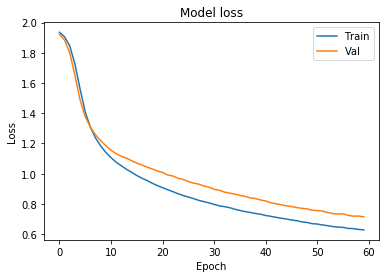

In [232]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

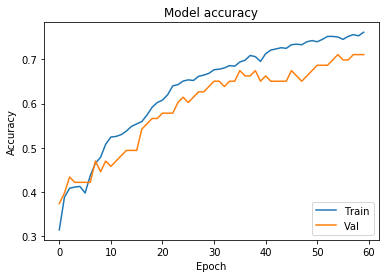

In [233]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()